# Import Library

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import prince
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Datasets Understanding

## Data Loading

In [2]:
phishing_websites = fetch_ucirepo(id=327) 
  
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
print(phishing_websites.metadata) 

print(phishing_websites.variables) 


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

menggunakan library ucimlrepo langsung untuk mengambil dataset

Ada 11055 Baris data dalam datasets tersebut, dengan jumlah fitur sebanyak 30 


# Analysis Variable

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

In [4]:
unique2 = 0
unique3 = 0
boolean_columns = []

for i in X.columns:
    if X[i].unique().size == 2:
        unique2 += 1
        if set(X[i].unique()) == {0, 1}:
            boolean_columns.append(i)
    else:
        unique3 += 1

print(f"Number 2 Unique Features: {unique2}")
print(f"Number 3 Unique Features: {unique3}")
print(f"Boolean Columns: {boolean_columns}")

Number 2 Unique Features: 22
Number 3 Unique Features: 8
Boolean Columns: ['redirect']


Data sudah berbentuk numerik dengan dua macam tipe

#### Fitur dengan 2 unique Value
Data dengan tipe ini terdapat sejumlah 22 kolom

#### Fitur dengan 3 Unique Value
Data dengan tipe ini terdapat sejumlah 8 kolom

Nilai -1, 0, dan 1 pada dataset ini tidak selalu merepresentasikan urutan (ordinal) atau level yang konsisten secara semantik. Beberapa fitur menggunakan nilai tersebut untuk menyatakan klasifikasi (legit/suspicious/phishing), sementara terdapat satu fitur yang hanya menyatakan kehadiran atau ketiadaan karakteristik teknis tertentu (boolean) yaitu fitur `redirect`. Oleh karena itu, interpretasi nilai harus dilihat per fitur berdasarkan deskripsi asalnya.

In [5]:
X[X.columns].astype('category').describe()

having_ip_address  url_length  shortining_service  having_at_symbol  \
count               11055       11055               11055             11055   
unique                  2           3                   2                 2   
top                     1          -1                   1                 1   
freq                 7262        8960                9611              9400   

        double_slash_redirecting  prefix_suffix  having_sub_domain  \
count                      11055          11055              11055   
unique                         2              2                  3   
top                            1             -1                  1   
freq                        9626           9590               4070   

        sslfinal_state  domain_registration_length  favicon  ...  rightclick  \
count            11055                       11055    11055  ...       11055   
unique               3                           2        2  ...           2   
top                  1                          -1        1  ...           1   
freq              6331                        7389     9002  ...       10579   

        popupwindow  iframe  age_of_domain  dnsrecord  web_traffic  page_rank  \
count         11055   11055          11055      11055        11055      11055   
unique            2       2              2          2            3          2   
top               1       1              1          1            1         -1   
freq           8918   10043           5866       7612         5831       8201   

        google_index  links_pointing_to_page  statistical_report  
count          11055                   11055               11055  
unique             2                       3                   2  
top                1                       0                   1  
freq            9516                    6156                9505  

[4 rows x 30 columns]

Untuk informasi statistik dataset, saya telah merubah tipe data nya terlebih dahulu agar nilai tidak dianggap sebagai integer, mealainkan sebagai category untuk memudahkan pembacaan informasi statistik

# Handle Missing Value

In [6]:
X.isnull().sum()

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64

Tidak terdapat missing value dalam dataset ini

## Handle Outliers and Invalid Data

In [7]:
for i in X.columns:
    if X[i].unique().size > 3:
        print(f"Terdapat outlier di fitur {i}")

Untuk pengecekan outlier, digunakan pendekatan yang berbeda karena seluruh fitur dalam dataset adalah fitur kategori, sehingga tidak akan cocok apabila menggunakan teknik IQR sebagai pengecekan outliers. Sebagai gantinya, pengecekan outlier dilakukan dengan cara mengecek jumlah unique value dalam tiap kolom, jika ada yang lebih maka dalam kolom itu terdapat outlier atau nilai yang tidak sesuai

# Univariate Analysis


Kolom: having_ip_address
                   jumlah sampel  persentase
having_ip_address                           
 1                          7262        65.7
-1                          3793        34.3


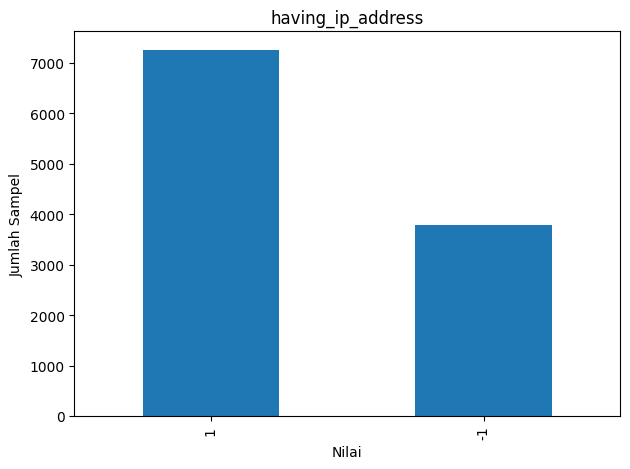


Kolom: url_length
            jumlah sampel  persentase
url_length                           
-1                   8960        81.0
 1                   1960        17.7
 0                    135         1.2


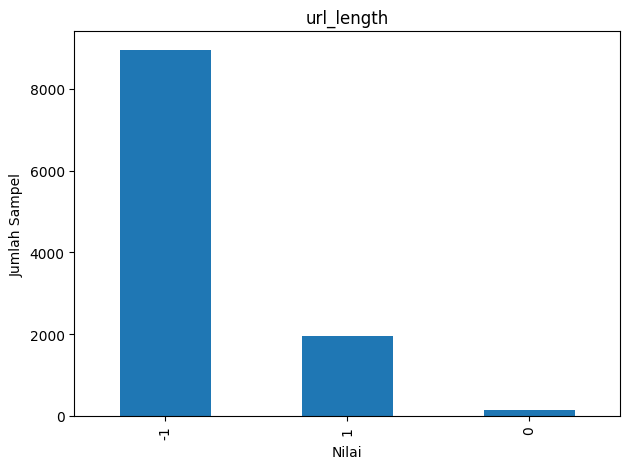


Kolom: shortining_service
                    jumlah sampel  persentase
shortining_service                           
 1                           9611        86.9
-1                           1444        13.1


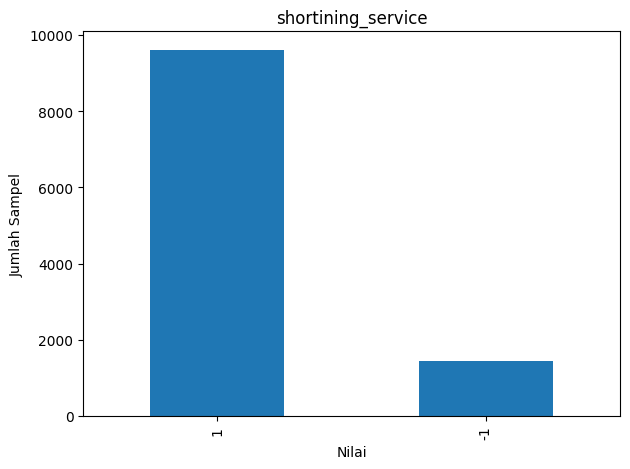


Kolom: having_at_symbol
                  jumlah sampel  persentase
having_at_symbol                           
 1                         9400        85.0
-1                         1655        15.0


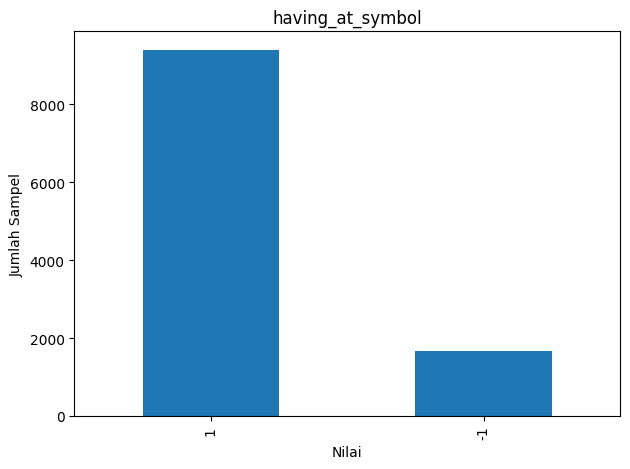


Kolom: double_slash_redirecting
                          jumlah sampel  persentase
double_slash_redirecting                           
 1                                 9626        87.1
-1                                 1429        12.9


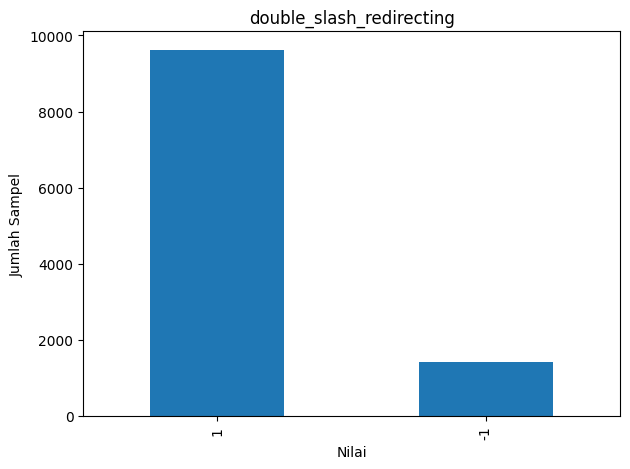


Kolom: prefix_suffix
               jumlah sampel  persentase
prefix_suffix                           
-1                      9590        86.7
 1                      1465        13.3


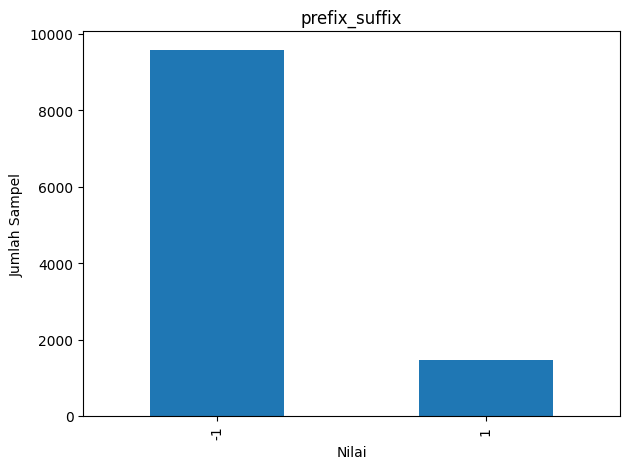


Kolom: having_sub_domain
                   jumlah sampel  persentase
having_sub_domain                           
 1                          4070        36.8
 0                          3622        32.8
-1                          3363        30.4


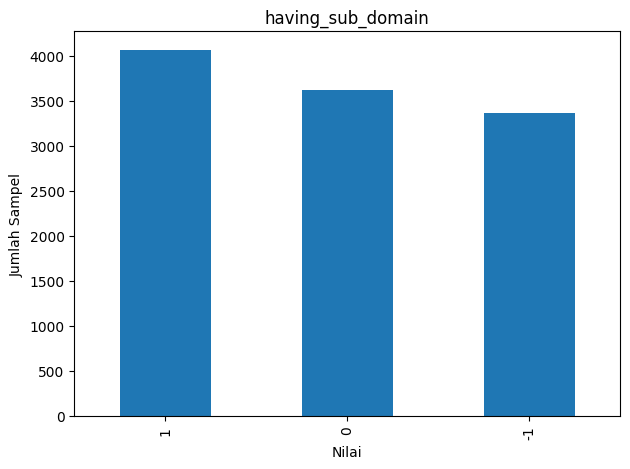


Kolom: sslfinal_state
                jumlah sampel  persentase
sslfinal_state                           
 1                       6331        57.3
-1                       3557        32.2
 0                       1167        10.6


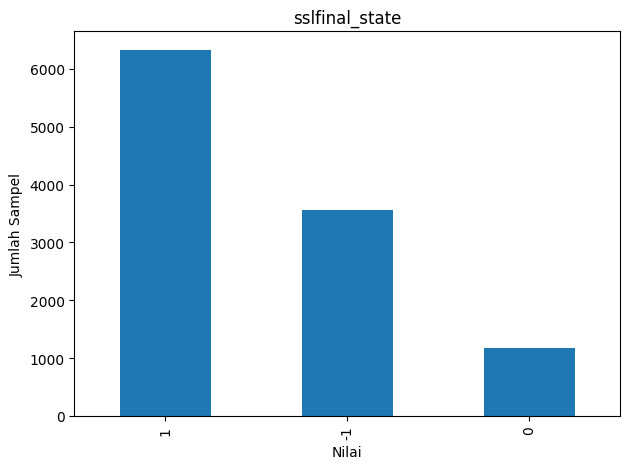


Kolom: domain_registration_length
                            jumlah sampel  persentase
domain_registration_length                           
-1                                   7389        66.8
 1                                   3666        33.2


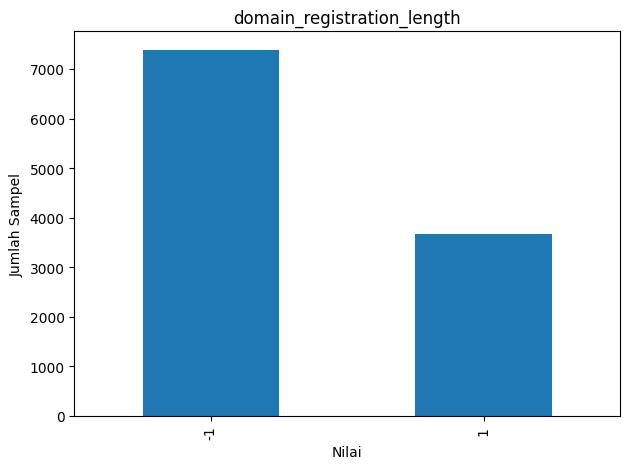


Kolom: favicon
         jumlah sampel  persentase
favicon                           
 1                9002        81.4
-1                2053        18.6


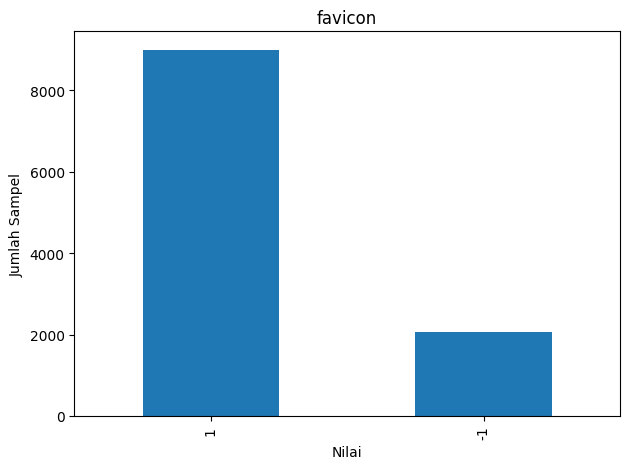


Kolom: port
      jumlah sampel  persentase
port                           
 1             9553        86.4
-1             1502        13.6


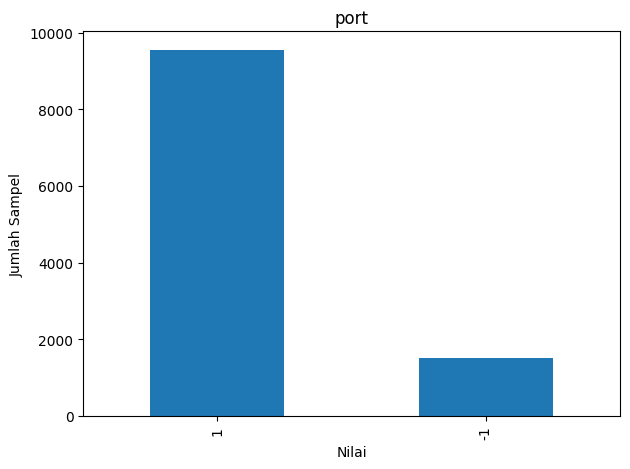


Kolom: https_token
             jumlah sampel  persentase
https_token                           
 1                    9259        83.8
-1                    1796        16.2


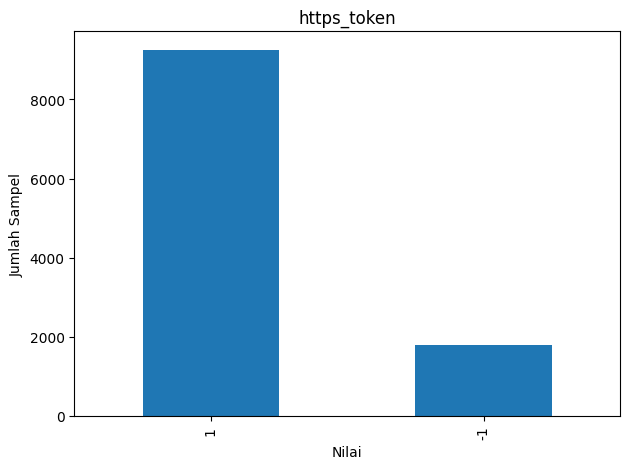


Kolom: request_url
             jumlah sampel  persentase
request_url                           
 1                    6560        59.3
-1                    4495        40.7


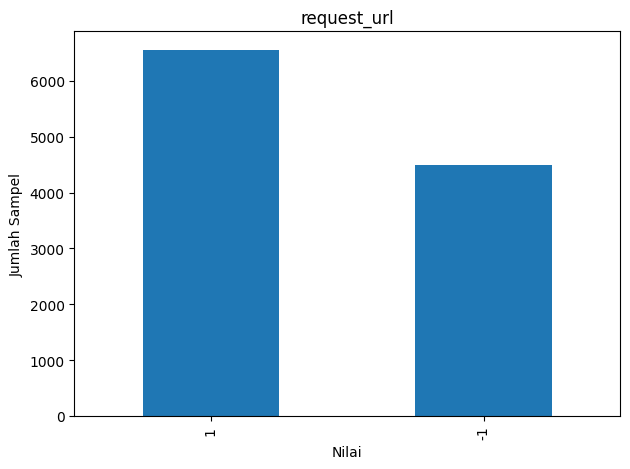


Kolom: url_of_anchor
               jumlah sampel  persentase
url_of_anchor                           
 0                      5337        48.3
-1                      3282        29.7
 1                      2436        22.0


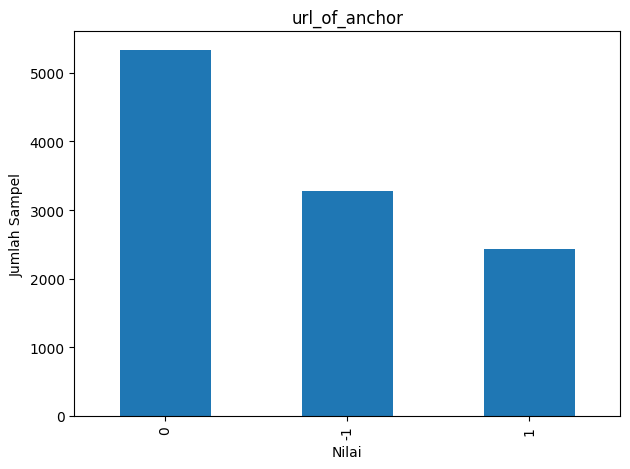


Kolom: links_in_tags
               jumlah sampel  persentase
links_in_tags                           
 0                      4449        40.2
-1                      3956        35.8
 1                      2650        24.0


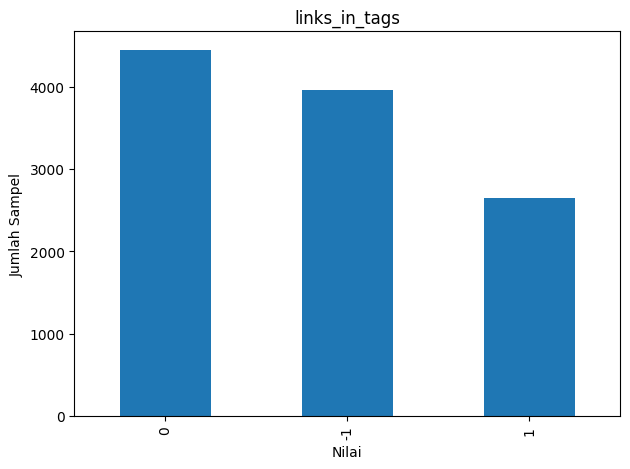


Kolom: sfh
     jumlah sampel  persentase
sfh                           
-1            8440        76.3
 1            1854        16.8
 0             761         6.9


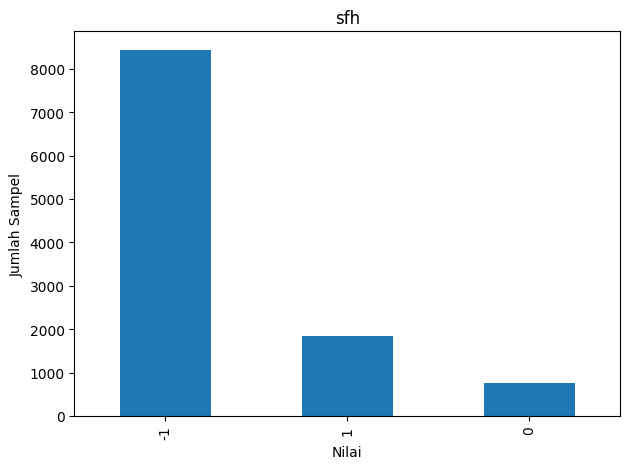


Kolom: submitting_to_email
                     jumlah sampel  persentase
submitting_to_email                           
 1                            9041        81.8
-1                            2014        18.2


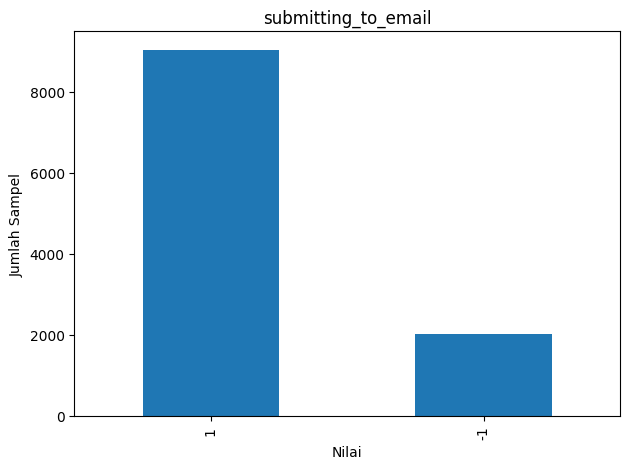


Kolom: abnormal_url
              jumlah sampel  persentase
abnormal_url                           
 1                     9426        85.3
-1                     1629        14.7


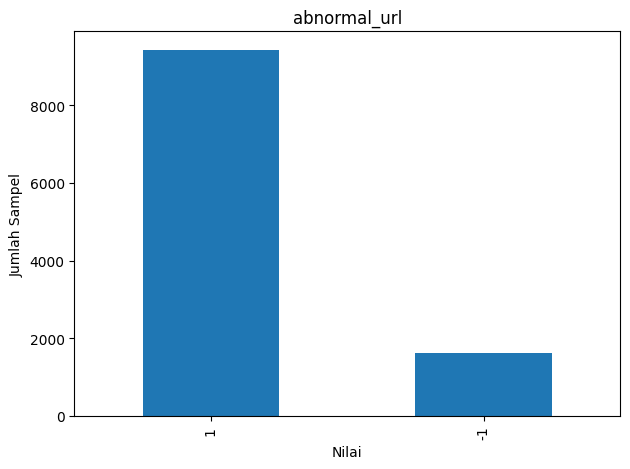


Kolom: redirect
          jumlah sampel  persentase
redirect                           
0                  9776        88.4
1                  1279        11.6


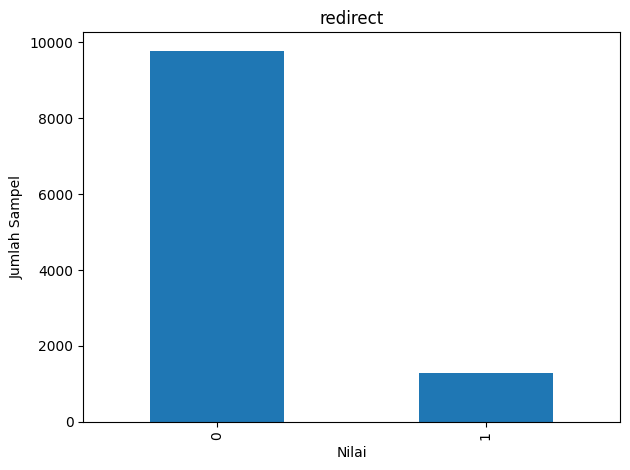


Kolom: on_mouseover
              jumlah sampel  persentase
on_mouseover                           
 1                     9740        88.1
-1                     1315        11.9


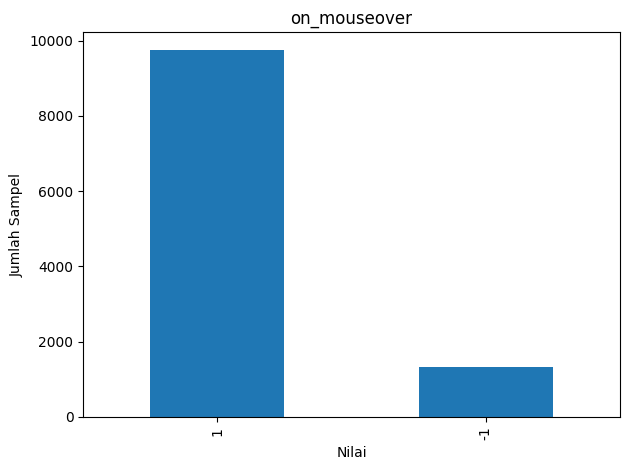


Kolom: rightclick
            jumlah sampel  persentase
rightclick                           
 1                  10579        95.7
-1                    476         4.3


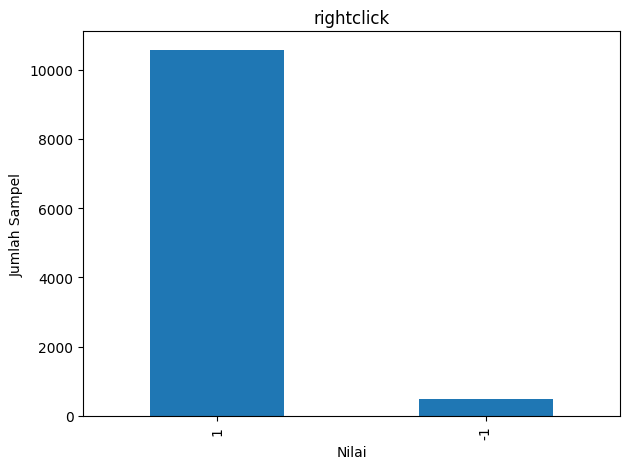


Kolom: popupwindow
             jumlah sampel  persentase
popupwindow                           
 1                    8918        80.7
-1                    2137        19.3


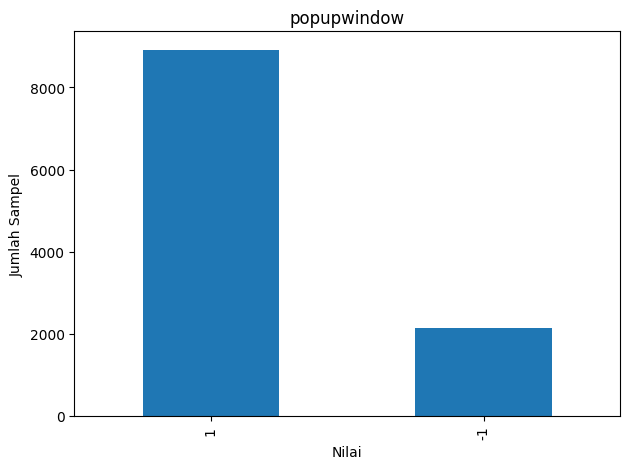


Kolom: iframe
        jumlah sampel  persentase
iframe                           
 1              10043        90.8
-1               1012         9.2


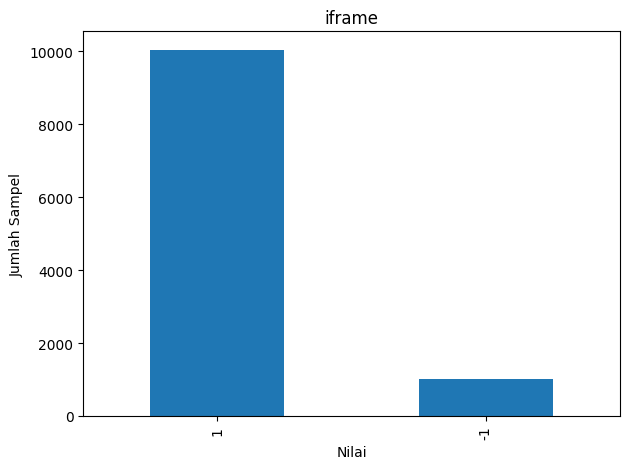


Kolom: age_of_domain
               jumlah sampel  persentase
age_of_domain                           
 1                      5866        53.1
-1                      5189        46.9


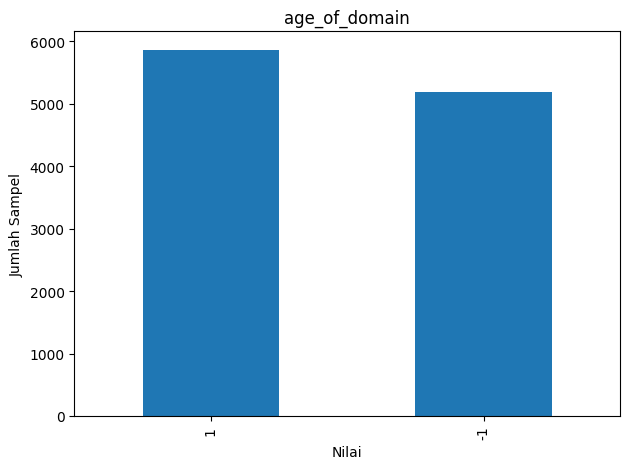


Kolom: dnsrecord
           jumlah sampel  persentase
dnsrecord                           
 1                  7612        68.9
-1                  3443        31.1


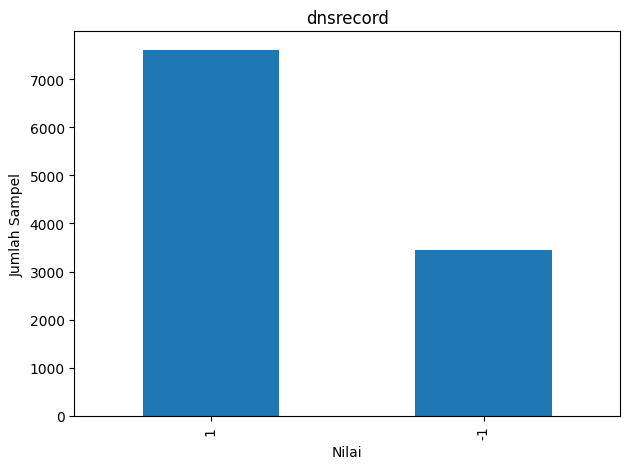


Kolom: web_traffic
             jumlah sampel  persentase
web_traffic                           
 1                    5831        52.7
-1                    2655        24.0
 0                    2569        23.2


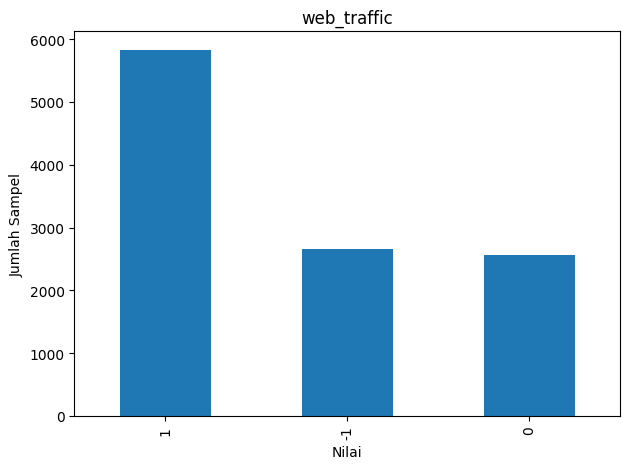


Kolom: page_rank
           jumlah sampel  persentase
page_rank                           
-1                  8201        74.2
 1                  2854        25.8


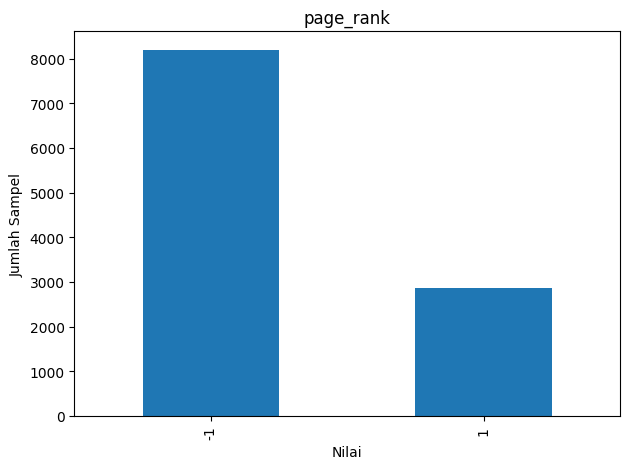


Kolom: google_index
              jumlah sampel  persentase
google_index                           
 1                     9516        86.1
-1                     1539        13.9


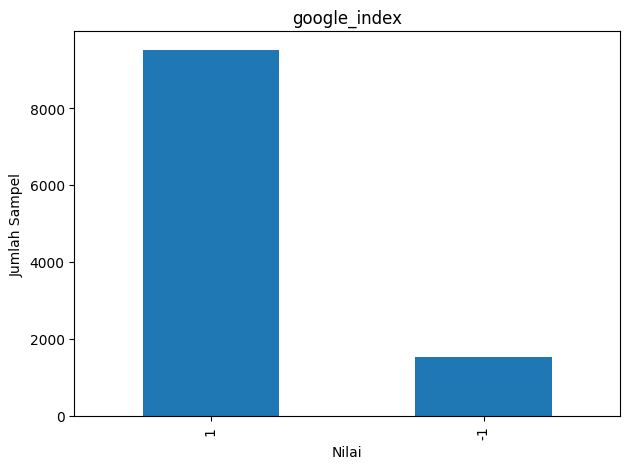


Kolom: links_pointing_to_page
                        jumlah sampel  persentase
links_pointing_to_page                           
 0                               6156        55.7
 1                               4351        39.4
-1                                548         5.0


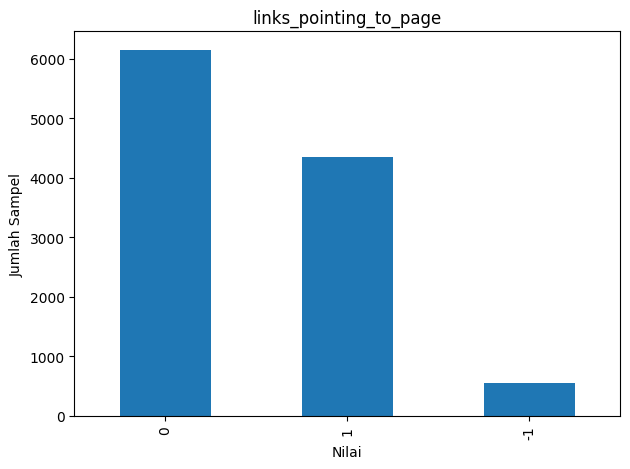


Kolom: statistical_report
                    jumlah sampel  persentase
statistical_report                           
 1                           9505        86.0
-1                           1550        14.0


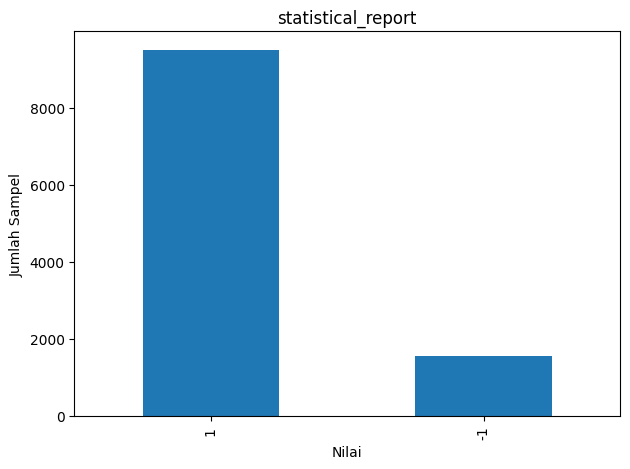

In [8]:


for i in X.columns:
    count = X[i].value_counts()
    percent = 100 * X[i].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nKolom: {i}")
    print(df)
    
    count.plot(kind='bar', title=i)
    plt.xlabel('Nilai')
    plt.ylabel('Jumlah Sampel')
    plt.tight_layout()
    plt.show()


Dari hasil visualisasi persebaran value di tiap fitur, hampir seluruh fitur memiliki kondisi imbalance. Nilai fitur lebih condong ke 1 (Legit)

# Multivariate Analysis

## Multiple Correspondence Analysis

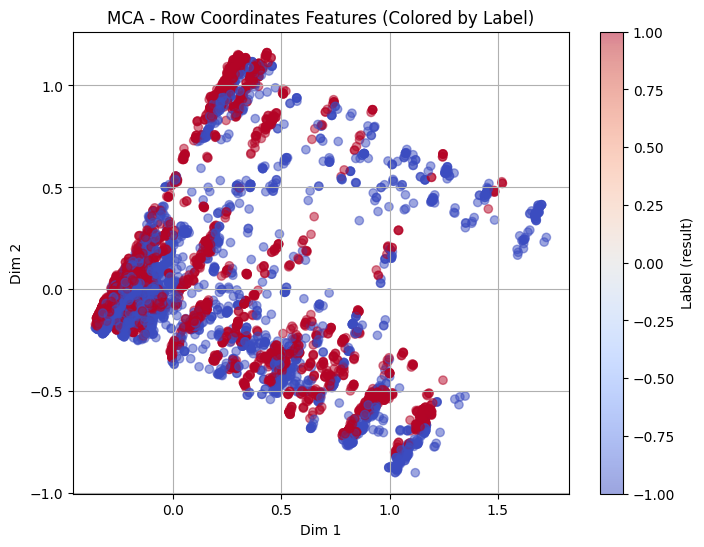

In [9]:
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(X)

row_coords = mca.transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(row_coords[0], row_coords[1], c=y['result'], cmap='coolwarm', alpha=0.5)
plt.title("MCA - Row Coordinates Features (Colored by Label)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.colorbar(scatter, label='Label (result)')
plt.show()

- Distribusi berlapis atau terpisah di area tertentu menunjukkan bahwa komponen hasil MCA mampu memetakan perbedaan antara kelas phishing dan non-phishing ke dalam dimensi lebih rendah.

- Clustering warna: Beberapa area didominasi oleh warna merah atau biru, artinya:

    - Observasi dengan label yang sama cenderung terkonsentrasi di wilayah tertentu dalam ruang MCA.

    - Ini menunjukkan bahwa MCA berhasil menangkap struktur diskriminatif dari fitur kategorikal dalam data.

- Overlap sebagian juga terlihat: artinya meskipun ada pemisahan, masih ada tumpang tindih antar kelas. Hal ini umum terjadi pada data kategorikal yang tidak sepenuhnya linier separable.

## Korelasi Fitur dengan Target

### Chi-Square Test of Independence

In [10]:
results = []

for col in X.columns:
    contingency = pd.crosstab(X[col], y['result'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    results.append({
        'Feature': col,
        'Chi-square': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

chi2_df = pd.DataFrame(results)

chi2_df = chi2_df.sort_values(by='p-value')

chi2_df

Feature   Chi-square        p-value  \
6            having_sub_domain  1595.294123   0.000000e+00   
7               sslfinal_state  6686.246056   0.000000e+00   
13               url_of_anchor  5966.367231   0.000000e+00   
25                 web_traffic  1712.181255   0.000000e+00   
5                prefix_suffix  1341.399192  1.139474e-293   
12                 request_url   708.665429  3.902709e-156   
14               links_in_tags   712.564882  1.855675e-155   
8   domain_registration_length   562.628588  2.253279e-124   
15                         sfh   542.417223  1.642845e-118   
27                google_index   183.075832   1.032457e-41   
23               age_of_domain   162.697327   2.913028e-37   
26                   page_rank   120.577505   4.728294e-28   
0            having_ip_address    97.616128   5.078857e-23   
29          statistical_report    70.036537   5.821611e-17   
24                   dnsrecord    63.051548   2.013671e-15   
28      links_pointing_to_page    66.522654   3.587478e-15   
1                   url_length    57.774681   2.846999e-13   
2           shortining_service    50.661841   1.097324e-12   
17                abnormal_url    40.104733   2.407051e-10   
3             having_at_symbol    30.694313   3.020491e-08   
19                on_mouseover    19.091985   1.245669e-05   
11                 https_token    17.342195   3.121778e-05   
4     double_slash_redirecting    16.247156   5.559299e-05   
10                        port    14.449423   1.439740e-04   
18                    redirect     4.346622   3.708242e-02   
16         submitting_to_email     3.587046   5.823168e-02   
20                  rightclick     1.646691   1.994099e-01   
22                      iframe     0.104722   7.462348e-01   
9                      favicon     0.000023   9.961924e-01   
21                 popupwindow     0.000000   1.000000e+00   

    Degrees of Freedom Significant  
6                    2         Yes  
7                    2         Yes  
13                   2         Yes  
25                   2         Yes  
5                    1         Yes  
12                   1         Yes  
14                   2         Yes  
8                    1         Yes  
15                   2         Yes  
27                   1         Yes  
23                   1         Yes  
26                   1         Yes  
0                    1         Yes  
29                   1         Yes  
24                   1         Yes  
28                   2         Yes  
1                    2         Yes  
2                    1         Yes  
17                   1         Yes  
3                    1         Yes  
19                   1         Yes  
11                   1         Yes  
4                    1         Yes  
10                   1         Yes  
18                   1         Yes  
16                   1          No  
20                   1          No  
22                   1          No  
9                    1          No  
21                   1          No

<Axes: ylabel='Feature'>

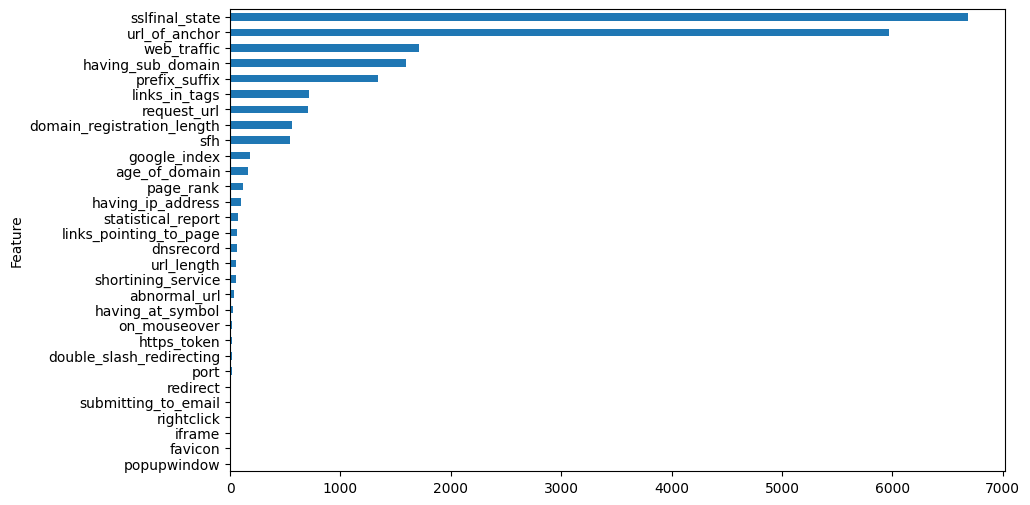

In [11]:
chi2_df_sorted = chi2_df.sort_values(by='Chi-square', ascending=True)
chi2_df_sorted.plot(x='Feature', y='Chi-square', kind='barh', figsize=(10, 6), legend=False)

Untuk mengecek korelasi, pada datasets ini, digunakan teknik **Chi-Square Test of Independence**, yaitu uji statistik yang digunakan untuk menentukan apakah dua variabel kategorikal memiliki hubungan atau saling bebas (independen) satu sama lain.

Teknik ini digunakan dengan alasan bahwa teknik umum seperti korelasi matrix tidak akan cocok jika dataset hanya memiliki tipe category saja

Pada hasil Chi-Square diatas, fitur yang memiliki nilai p kecil, fitur tersebut memiliki hubungan yang signifikan dengan target. Dalam analisis ini, nilai p < 0.05 maka dianggap memiliki hubungan yang signifikan dengan target

# Data Preparation

## Dimension Reduction

In [12]:
mca = prince.MCA(n_components=15, random_state=42)
mca = mca.fit(X)


mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.181        14.30%                     14.30%
1              0.138        10.91%                     25.21%
2              0.093         7.34%                     32.54%
3              0.055         4.36%                     36.90%
4              0.051         4.03%                     40.93%
5              0.047         3.73%                     44.66%
6              0.042         3.33%                     47.99%
7              0.040         3.18%                     51.17%
8              0.039         3.05%                     54.22%
9              0.037         2.91%                     57.14%
10             0.035         2.76%                     59.89%
11             0.034         2.70%                     62.59%
12             0.033         2.61%                     65.20%
13             0.032         2.51%                     67.71%
14             0.031         2.45%                     70.16%

Multiple Correspondence Analysis (MCA) digunakan untuk mereduksi dimensi data yang seluruh fiturnya bertipe kategori karena metode ini dirancang khusus untuk menangkap pola dan hubungan antar kategori. Berbeda dengan PCA yang hanya cocok untuk data numerik, MCA mampu merepresentasikan data kategorikal ke dalam bentuk numerik berdimensi lebih rendah, sehingga memudahkan visualisasi dan analisis tanpa kehilangan informasi penting dari struktur asli data.

karena setengah fitur yang di reduksi MCA sudah cukup mewakili variance, maka fitur akan di reduksi menjadi 15 fitur dengan MCA


In [13]:
X_reduced = mca.transform(X)
X_reduced

0         1         2         3         4         5         6   \
0      0.413792  0.592722  0.276242  0.290534 -0.370620  0.036731 -0.272486   
1     -0.122581  0.208008 -0.023403  0.216761 -0.133678  0.257708 -0.032186   
2      0.191027  0.264639  0.120570  0.108887 -0.376319  0.713616  0.473802   
3     -0.122463  0.189967  0.272828 -0.007885 -0.144693  0.714824  0.522568   
4      0.248219  0.093442 -0.074400  0.074152 -0.040633  0.582715  0.506819   
...         ...       ...       ...       ...       ...       ...       ...   
11050  1.140831 -0.673152 -0.479670 -0.312360  0.034715 -0.448424 -0.055131   
11051  1.010727  0.163684 -0.142660  0.711404  0.608659  0.058099  0.289170   
11052 -0.325019 -0.116203 -0.112848  0.000981 -0.003483  0.142939  0.182136   
11053  0.332252 -0.257383  0.306381 -0.216169  0.004726 -0.116096  0.102960   
11054 -0.122435 -0.052501  0.604861 -0.110563 -0.158050 -0.021312 -0.153128   

             7         8         9         10        11        12        13  \
0      0.024652  0.132170  0.049344  0.106787  0.256379  0.073947 -0.406109   
1     -0.268352 -0.163635 -0.210981 -0.151849  0.058636 -0.063517  0.153469   
2      0.712143  0.548942 -0.140924 -0.282709  0.542898  0.155323  0.273344   
3      0.774958  0.818444 -0.063019 -0.181785  0.935621 -0.174431  0.375130   
4      0.474749  0.318223 -0.214228 -0.014637  0.445559 -0.015478  0.709075   
...         ...       ...       ...       ...       ...       ...       ...   
11050  0.064994 -0.240656  0.317483  0.102541  0.145976 -0.035151 -0.103809   
11051  0.108394  0.102585  0.159108 -0.003585  0.389481  0.086155 -0.385954   
11052 -0.058587 -0.164299 -0.024556 -0.003931 -0.027454  0.019224 -0.158515   
11053 -0.222396  0.077887 -0.015301 -0.009503  0.243049  0.061624 -0.296249   
11054 -0.088248  0.240592  0.262746  0.040137  0.096132 -0.071036 -0.041823   

             14  
0      0.113110  
1     -0.154097  
2      0.859573  
3      0.182180  
4      0.210749  
...         ...  
11050 -0.030637  
11051 -0.195195  
11052  0.108815  
11053  0.106965  
11054  0.074492  

[11055 rows x 15 columns]

In [14]:
X_reduced.describe()

0             1             2             3             4   \
count  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04   
mean  -8.516229e-18  7.070077e-18  5.141874e-18 -1.349742e-17  2.313843e-17   
std    4.255500e-01  3.717930e-01  3.048293e-01  2.350720e-01  2.259118e-01   
min   -3.591152e-01 -8.994021e-01 -7.717819e-01 -6.671729e-01 -6.768497e-01   
25%   -2.816534e-01 -1.417600e-01 -2.472932e-01 -1.635632e-01 -1.599362e-01   
50%   -1.996890e-01 -7.038896e-02 -2.496220e-02 -1.361580e-02 -2.060854e-02   
75%    2.066787e-01  3.492184e-02  2.434837e-01  1.426984e-01  1.543989e-01   
max    1.723792e+00  1.160596e+00  7.740857e-01  8.684629e-01  8.265644e-01   

                 5             6             7             8             9   \
count  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04   
mean   1.028375e-17 -5.656062e-17 -9.383920e-17  7.841358e-17 -3.856406e-17   
std    2.172634e-01  2.054948e-01  2.005698e-01  1.967107e-01  1.921580e-01   
min   -7.069898e-01 -7.151641e-01 -6.018793e-01 -5.366599e-01 -6.066438e-01   
25%   -1.320294e-01 -1.428132e-01 -1.300229e-01 -1.513174e-01 -1.349717e-01   
50%    1.421318e-02  1.021256e-02 -6.368193e-03 -1.360600e-02 -1.016997e-02   
75%    1.490850e-01  1.348384e-01  1.214826e-01  1.318368e-01  1.185020e-01   
max    8.372564e-01  1.053807e+00  1.155745e+00  9.461780e-01  7.861363e-01   

                 10            11            12            13            14  
count  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04  1.105500e+04  
mean   6.009565e-17 -7.712811e-18 -4.113499e-17 -1.928203e-17  3.599312e-17  
std    1.868668e-01  1.848135e-01  1.818599e-01  1.781761e-01  1.763371e-01  
min   -7.402204e-01 -5.486164e-01 -5.913006e-01 -5.863917e-01 -6.865062e-01  
25%   -1.214198e-01 -1.296979e-01 -1.255007e-01 -1.230778e-01 -1.120284e-01  
50%   -6.694870e-03 -1.548734e-02  1.568331e-04  1.149433e-02  3.375391e-03  
75%    1.237356e-01  1.079749e-01  1.247774e-01  1.230260e-01  1.097498e-01  
max    7.558390e-01  9.889936e-01  6.080012e-01  7.752178e-01  9.787500e-01

MCA dimulai dengan membuat tabel kontingensi yang menunjukkan frekuensi setiap kemungkinan kombinasi kategori. Hasil MCA tidak perlu standardisasi karena semua data input-nya sudah dalam bentuk kategori (dan MCA berbasis kontingensi, bukan magnitudo nilai).

## Splitting Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y['result'], test_size=0.2, random_state=42)

In [16]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11055
Total # of sample in train dataset: 8844
Total # of sample in test dataset: 2211


# Modelling

In [17]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['LogReg', 'RandomForest', 'XGBoost'])

Pemilihan Model untuk Data Hasil MCA

Saya memilih Logistic Regression, Random Forest, dan XGBoost karena alasan berikut:

- Logistic Regression: Model sederhana dan cepat, cocok untuk data numerik dengan fitur yang sudah orthogonal dari MCA, serta mudah diinterpretasi.

- Random Forest: Mampu menangani hubungan non-linear dan interaksi antar fitur tanpa banyak pra-pemrosesan, cocok untuk menangkap pola kompleks dari data MCA.

- XGBoost: Model boosting yang efisien dan akurat, sangat baik untuk dataset berdimensi sedang dengan pola non-linear yang rumit.

Ketiga model ini memberikan kombinasi yang baik antara interpretabilitas, kekuatan, dan kemampuan menangkap kompleksitas data hasil MCA.

## Logistic Regression

In [18]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


models.loc['train_acc', 'LogReg'] = logreg.score(X_train, y_train)
models.loc['test_acc', 'LogReg'] = logreg.score(X_test, y_test)

print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92       956
           1       0.93      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



## Random Forest

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

models.loc['train_acc', 'RandomForest'] = rf.score(X_train, y_train)
models.loc['test_acc', 'RandomForest'] = rf.score(X_test, y_test)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



## Xgboost

In [20]:
y_train_xgb = y_train.replace(-1, 0)
y_test_xgb = y_test.replace(-1, 0)

xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train_xgb)

models.loc['train_acc', 'XGBoost'] = xgboost.score(X_train, y_train_xgb)
models.loc['test_acc', 'XGBoost'] = xgboost.score(X_test, y_test_xgb)


print(classification_report(y_test_xgb, xgboost.predict(X_test)))

d:\CODING\PYTHON\MACHINE_LEARNING\Predictive_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:26:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       956
           1       0.96      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Evaluation

In [21]:
models

LogReg RandomForest   XGBoost
train_acc  0.930348     0.990615  0.990615
test_acc   0.933062     0.963817  0.961556

dari hasil evaluasi dan classification report, dapat dilihat bahwa baseline model dapat memprediksi dengan baik dataset test

# Feature Importance

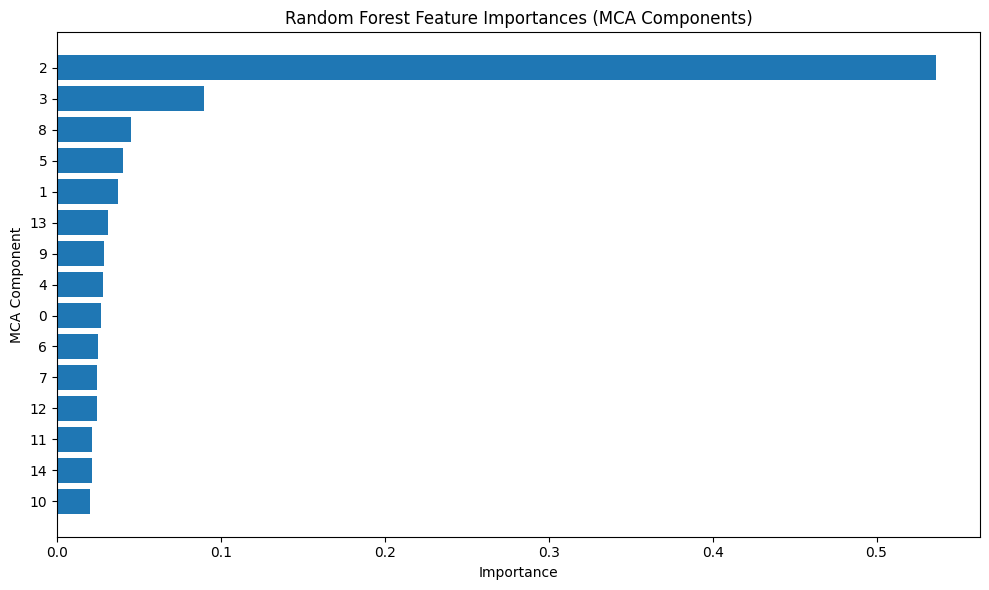

Feature  Importance
2         2    0.536315
3         3    0.089970
8         8    0.045298
5         5    0.040180
1         1    0.037325
13       13    0.031230
9         9    0.028439
4         4    0.027810
0         0    0.026755
6         6    0.025182
7         7    0.024592
12       12    0.024092
11       11    0.021351
14       14    0.021101
10       10    0.020360

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
feature_names = X_reduced.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'].astype(str), feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('MCA Component')
plt.title('Random Forest Feature Importances (MCA Components)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

feat_imp_df

feature importance diambil dari properties model `feature_importances_`

### Mengecek fitur yang paling berkontribusi di componen 2 MCA

In [23]:

pd.set_option('display.max_rows', None)
col_coords = mca.column_coordinates(X)
component_2 = col_coords.iloc[:, 1]
sorted_component_2 = component_2.abs().sort_values(ascending=False)

# Buat DataFrame hasil
result_df = pd.DataFrame({
    'Feature': sorted_component_2.index,
    'Abs(Component 2)': sorted_component_2.values
})

print(result_df)

                           Feature  Abs(Component 2)
0     double_slash_redirecting__-1          2.106617
1           shortining_service__-1          2.093770
2                 abnormal_url__-1          1.715935
3                  https_token__-1          1.713671
4                      redirect__1          1.608653
5                   rightclick__-1          1.303717
6                       iframe__-1          1.178926
7                         port__-1          1.013857
8                 on_mouseover__-1          0.799002
9                      favicon__-1          0.785016
10                 popupwindow__-1          0.709627
11         submitting_to_email__-1          0.641543
12                   dnsrecord__-1          0.631670
13           having_ip_address__-1          0.565223
14      links_pointing_to_page__-1          0.445354
15                   url_length__0          0.389172
16                google_index__-1          0.378937
17       links_pointing_to_page__1          0.

Untuk melihat fitur apa saja yang berkontribusi pada `component 2`, menggunakan koordinat kolom dan diambil hanya component 2 saja

Dapat dilihat bahwa double slash dan shortining service memiliki kontribusi besar di componen 2, sehingga dapat menjadi indikasi bahwa fitur-fitur tersebut berperan penting dalam membedakan antara URL phishing dan non-phishing. Oleh karena itu, fitur-fitur ini layak mendapat perhatian lebih dalam proses deteksi phishing, baik untuk analisis lanjutan maupun pengembangan model yang lebih akurat dan interpretatif.